## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import os
import keras
import itertools
# Disable GPU
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization
"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZES = [2, 16, 32, 128, 256] 
MOMENTUM = 0.95

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for BATCH_SIZE in BATCH_SIZES:
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    exp_name_tag = "BATCH_SIZE %s" %(BATCH_SIZE)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)              

25000/25000 [==============================] - 59s 2ms/step - loss: 2.2623 - accuracy: 0.1481 - val_loss: 12.5995 - val_accuracy: 0.1726
Epoch 47/50
25000/25000 [==============================] - 61s 2ms/step - loss: 2.2630 - accuracy: 0.1440 - val_loss: 32.9015 - val_accuracy: 0.1761
Epoch 48/50
25000/25000 [==============================] - 60s 2ms/step - loss: 2.2626 - accuracy: 0.1452 - val_loss: 30.9411 - val_accuracy: 0.1775
Epoch 49/50
25000/25000 [==============================] - 60s 2ms/step - loss: 2.2654 - accuracy: 0.1457 - val_loss: 22.3124 - val_accuracy: 0.1663
Epoch 50/50
25000/25000 [==============================] - 59s 2ms/step - loss: 2.2657 - accuracy: 0.1473 - val_loss: 14.1930 - val_accuracy: 0.1476
Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 3072)]            0         
_______________________________________________

3125/3125 [==============================] - 12s 4ms/step - loss: 1.1275 - accuracy: 0.6016 - val_loss: 1.3781 - val_accuracy: 0.5253
Epoch 43/50
3125/3125 [==============================] - 12s 4ms/step - loss: 1.1263 - accuracy: 0.5987 - val_loss: 1.3601 - val_accuracy: 0.5217
Epoch 44/50
3125/3125 [==============================] - 12s 4ms/step - loss: 1.1297 - accuracy: 0.5994 - val_loss: 1.4193 - val_accuracy: 0.5127
Epoch 45/50
3125/3125 [==============================] - 11s 4ms/step - loss: 1.1199 - accuracy: 0.6036 - val_loss: 1.3797 - val_accuracy: 0.5316
Epoch 46/50
3125/3125 [==============================] - 11s 4ms/step - loss: 1.1150 - accuracy: 0.6057 - val_loss: 1.3657 - val_accuracy: 0.5263
Epoch 47/50
3125/3125 [==============================] - 12s 4ms/step - loss: 1.1087 - accuracy: 0.6059 - val_loss: 1.3934 - val_accuracy: 0.5150
Epoch 48/50
3125/3125 [==============================] - 11s 4ms/step - loss: 1.1087 - accuracy: 0.6043 - val_loss: 1.3721 - val_accurac

1563/1563 [==============================] - 10s 6ms/step - loss: 0.8879 - accuracy: 0.6820 - val_loss: 1.4684 - val_accuracy: 0.5259
Epoch 39/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8736 - accuracy: 0.6873 - val_loss: 1.5080 - val_accuracy: 0.5219
Epoch 40/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8580 - accuracy: 0.6948 - val_loss: 1.5360 - val_accuracy: 0.5174
Epoch 41/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8474 - accuracy: 0.6979 - val_loss: 1.5593 - val_accuracy: 0.5209
Epoch 42/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8457 - accuracy: 0.6974 - val_loss: 1.6856 - val_accuracy: 0.4841
Epoch 43/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8564 - accuracy: 0.6955 - val_loss: 1.6384 - val_accuracy: 0.5012
Epoch 44/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8342 - accuracy: 0.7007 - val_loss: 1.6181 - val_accurac

Epoch 35/50
391/391 [==============================] - 4s 11ms/step - loss: 0.4697 - accuracy: 0.8353 - val_loss: 2.1679 - val_accuracy: 0.4643
Epoch 36/50
391/391 [==============================] - 4s 10ms/step - loss: 0.4418 - accuracy: 0.8478 - val_loss: 2.2035 - val_accuracy: 0.4498
Epoch 37/50
391/391 [==============================] - 4s 10ms/step - loss: 0.4277 - accuracy: 0.8532 - val_loss: 2.1347 - val_accuracy: 0.4630
Epoch 38/50
391/391 [==============================] - 4s 10ms/step - loss: 0.4285 - accuracy: 0.8481 - val_loss: 2.2941 - val_accuracy: 0.4357
Epoch 39/50
391/391 [==============================] - 5s 12ms/step - loss: 0.4137 - accuracy: 0.8560 - val_loss: 2.0864 - val_accuracy: 0.4669
Epoch 40/50
391/391 [==============================] - 4s 11ms/step - loss: 0.3930 - accuracy: 0.8653 - val_loss: 2.4546 - val_accuracy: 0.4349
Epoch 41/50
391/391 [==============================] - 4s 10ms/step - loss: 0.3736 - accuracy: 0.8699 - val_loss: 2.1452 - val_accuracy:

196/196 [==============================] - 3s 14ms/step - loss: 0.4331 - accuracy: 0.8620 - val_loss: 1.9523 - val_accuracy: 0.4717
Epoch 33/50
196/196 [==============================] - 3s 15ms/step - loss: 0.4009 - accuracy: 0.8748 - val_loss: 1.9833 - val_accuracy: 0.4635
Epoch 34/50
196/196 [==============================] - 3s 15ms/step - loss: 0.3835 - accuracy: 0.8793 - val_loss: 2.0000 - val_accuracy: 0.4549
Epoch 35/50
196/196 [==============================] - 3s 15ms/step - loss: 0.3654 - accuracy: 0.8863 - val_loss: 2.1510 - val_accuracy: 0.4584
Epoch 36/50
196/196 [==============================] - 3s 15ms/step - loss: 0.3435 - accuracy: 0.8944 - val_loss: 2.0755 - val_accuracy: 0.4642
Epoch 37/50
196/196 [==============================] - 3s 15ms/step - loss: 0.3267 - accuracy: 0.9014 - val_loss: 2.0839 - val_accuracy: 0.4623
Epoch 38/50
196/196 [==============================] - 3s 15ms/step - loss: 0.3157 - accuracy: 0.9037 - val_loss: 2.1840 - val_accuracy: 0.4580
Epoc

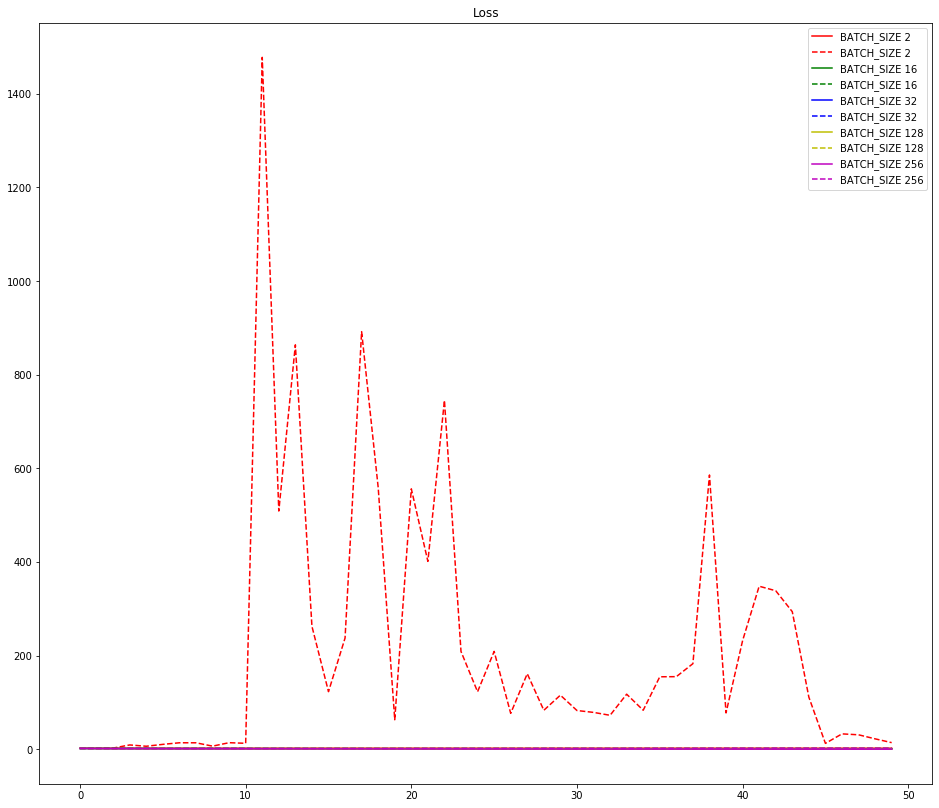

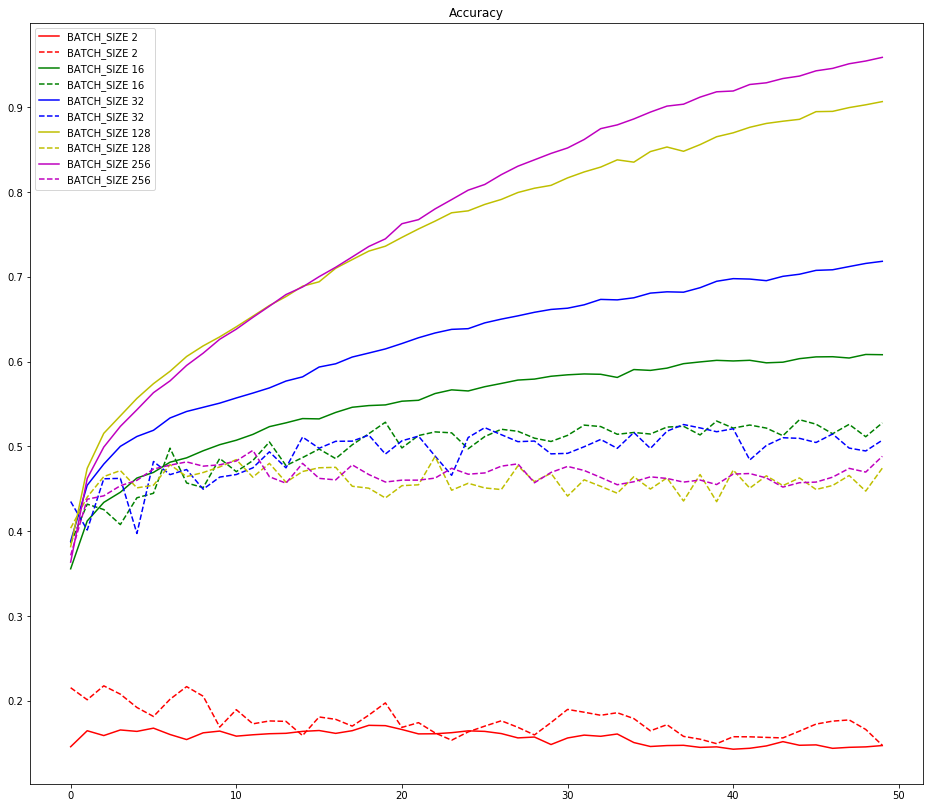

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k",'c','coral']

plt.figure(figsize=(16,14))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(16,14))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()